In [ ]:
!nvidia-smi

Thu May 25 08:06:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/notRobot200/CycleMe.git

Cloning into 'CycleMe'...
remote: Enumerating objects: 6594, done.
remote: Counting objects: 100% (853/853), done.
remote: Compressing objects: 100% (840/840), done.
remote: Total 6594 (delta 18), reused 844 (delta 13), pack-reused 5741
Receiving objects: 100% (6594/6594), 229.59 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
import tensorflow as tf

DIR = "/content/CycleMe/CycleMeDataset"
dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR)
classes = dataset.class_names
print(classes)

Found 4280 files belonging to 8 classes.
['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']


In [ ]:
import os

labels = ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']
for label in labels:
    directory = os.path.join(DIR, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Aluminium":	 607
Images of label "Carton":	 336
Images of label "Glass":	 597
Images of label "Organic Waste":	 562
Images of label "Paper and Cardboard":	 602
Images of label "Plastic":	 596
Images of label "Styrofoam":	 395
Images of label "Textiles":	 585


In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/CycleMe/CycleMeDataset"
image_extensions = [".png", ".jpg", ".jpeg", ".GIF"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/CycleMe/CycleMeDataset/Organic Waste/org (22).jpg is not an image
/content/CycleMe/CycleMeDataset/Organic Waste/org (183).jpg is not an image
/content/CycleMe/CycleMeDataset/Carton/cart (15).jpg is not an image
/content/CycleMe/CycleMeDataset/Aluminium/alum (290).jpg is not an image
/content/CycleMe/CycleMeDataset/Aluminium/alum (271).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (10).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (11).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (356).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (13).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (336).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (7).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (14).jpg is not an image
/content/CycleMe/CycleMeDataset/Plastic/plast (12).jpg is not an image
/content/CycleMe/CycleMeDataset/Styrofoam/STYROFOAM (7).jpg is a webp, not acce

In [ ]:
from pathlib import Path
import imghdr

from pathlib import Path
import imghdr

img_link=list(Path("/content/CycleMe/CycleMeDataset").glob(r'**/*.jpg'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)#The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)
#this should help you delete the bad encoded

Total 79 pcs image delete from Dataset


In [ ]:
import os

labels = ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']
for label in labels:
    directory = os.path.join(DIR, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Aluminium":	 598
Images of label "Carton":	 323
Images of label "Glass":	 585
Images of label "Organic Waste":	 542
Images of label "Paper and Cardboard":	 601
Images of label "Plastic":	 593
Images of label "Styrofoam":	 385
Images of label "Textiles":	 574


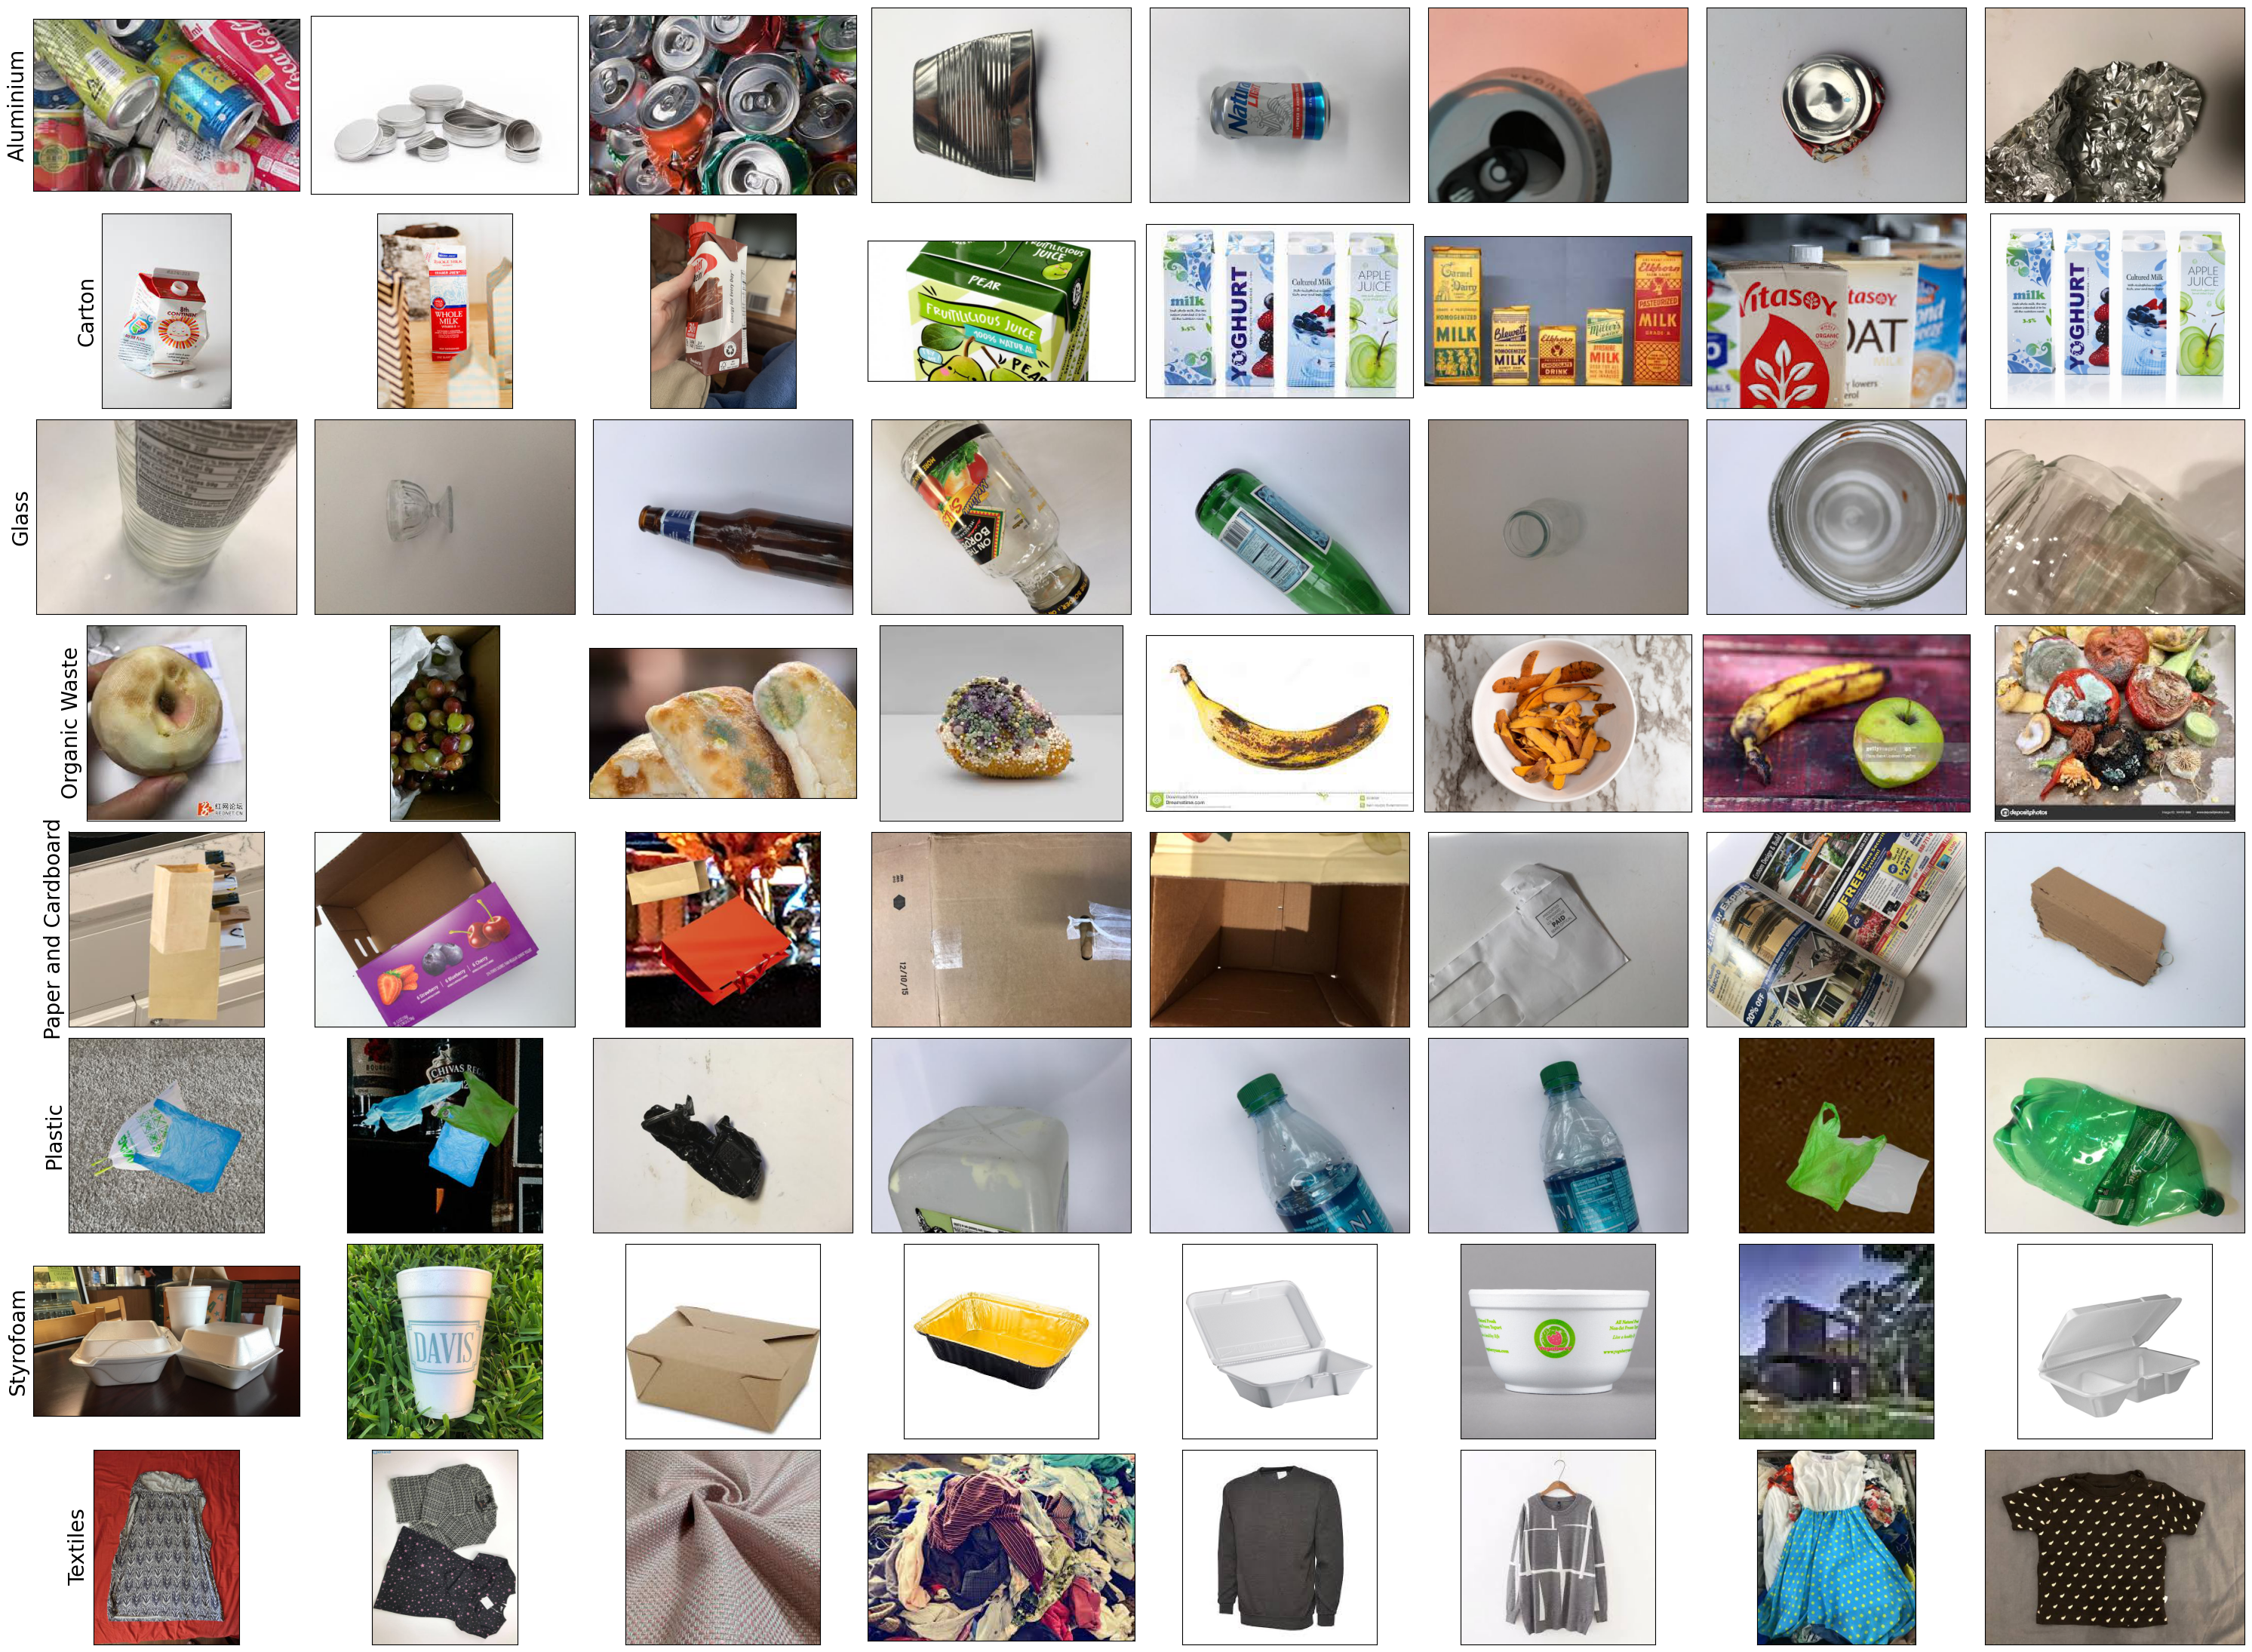

In [ ]:
# plotting images of different review for understanding the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(30,22))

for i in range(8):
    directory = os.path.join(DIR, labels[i])
    for j in range(8):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(8, 8, i*8 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, 
                                                                    validation_split=0.1, 
                                                                    subset="training", 
                                                                    seed=42, 
                                                                    batch_size=128, 
                                                                    smart_resize=True, 
                                                                    image_size=(256, 256))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, 
                                                                   validation_split=0.1, 
                                                                   subset="validation", 
                                                                   seed=42, 
                                                                   batch_size=128, 
                                                                   smart_resize=True, 
                                                                   image_size=(256, 256))

classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# train_datagen = ImageDataGenerator(rescale=1./255.,
#                                    validation_split=0.2)

# train_generator = train_datagen.flow_from_directory(DIR,  
#                                                     batch_size=128, 
#                                                     class_mode='binary', 
#                                                     subset='training',
#                                                     target_size = (256, 256))
# validation_generator = train_datagen.flow_from_directory(DIR, 
#                                                          batch_size=128, 
#                                                          class_mode='binary', 
#                                                          subset='validation',
#                                                          target_size = (256, 256))

Found 4201 files belonging to 8 classes.
Using 3781 files for training.
Found 4201 files belonging to 8 classes.
Using 420 files for validation.
['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']


In [ ]:
# checking size of individual image

directory = os.path.join(DIR, 'Textiles')
path = os.path.join(directory, os.listdir(directory)[102])
image = mpimg.imread(path)
image.shape

(268, 188, 3)

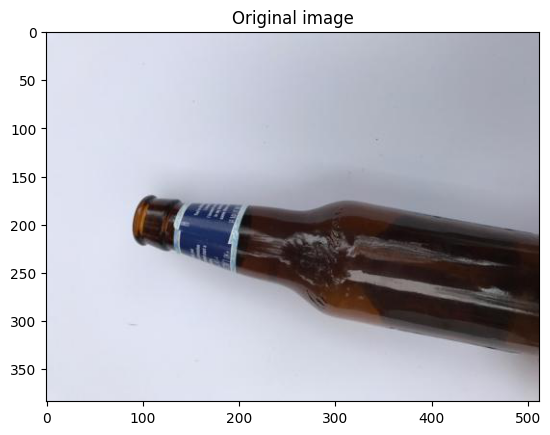

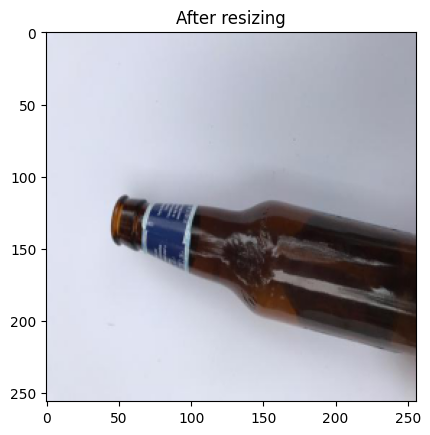

In [ ]:
import cv2

directory = os.path.join(DIR, 'Glass')
path = os.path.join(directory, os.listdir(directory)[2])

img = plt.imread(path)
plt.imshow(img)
plt.title("Original image")
plt.show()

plt.imshow(cv2.resize(img, (256,256)))
plt.title("After resizing")
plt.show()

In [ ]:
# creating the model


model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  # tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.MaxPooling2D(2, 2),
  # tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_36 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_37 (Bat  (None, 252, 252, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_dataset, 
                    epochs=20, 
                    verbose=2, 
                    validation_data=test_dataset, 
                    callbacks=[callbacks])

Epoch 1/20
30/30 - 47s - loss: 2.0864 - accuracy: 0.3819 - val_loss: 2.6035 - val_accuracy: 0.1381 - 47s/epoch - 2s/step
Epoch 2/20
30/30 - 42s - loss: 1.2674 - accuracy: 0.5877 - val_loss: 2.5444 - val_accuracy: 0.1857 - 42s/epoch - 1s/step
Epoch 3/20
30/30 - 42s - loss: 0.9858 - accuracy: 0.6763 - val_loss: 2.6791 - val_accuracy: 0.2571 - 42s/epoch - 1s/step
Epoch 4/20
30/30 - 41s - loss: 0.7409 - accuracy: 0.7622 - val_loss: 2.7881 - val_accuracy: 0.2381 - 41s/epoch - 1s/step
Epoch 5/20
30/30 - 41s - loss: 0.5326 - accuracy: 0.8387 - val_loss: 2.2748 - val_accuracy: 0.2905 - 41s/epoch - 1s/step
Epoch 6/20
30/30 - 41s - loss: 0.3858 - accuracy: 0.8881 - val_loss: 1.9673 - val_accuracy: 0.4048 - 41s/epoch - 1s/step
Epoch 7/20
30/30 - 42s - loss: 0.2876 - accuracy: 0.9114 - val_loss: 1.8411 - val_accuracy: 0.4548 - 42s/epoch - 1s/step
Epoch 8/20
30/30 - 41s - loss: 0.2117 - accuracy: 0.9421 - val_loss: 1.8985 - val_accuracy: 0.4238 - 41s/epoch - 1s/step
Epoch 9/20
30/30 - 41s - loss: 0